 ## Modèle Linéaire

Les modèles linéaires, ou modèles de tendance, représentent une TS qui peut être représenté par une ligne droite. L'équation de base est : $$x_{t} = a_0+a_1 t + b$$

La valeur de la série temporelle est déterminée par les coefficients, $a_0, a_1$ et le temps. Un exemple pourrait être les ventes d'une entreprise qui augmentent du même montant à chaque pas de temps. Pour un exemple hypothétique, considérons une entreprise dont le cours de l'action était de 100$ au départ, et qui augmente de 50c à chaque pas de temps.

In [3]:
import os
import sys

import pandas as pd
import numpy as np

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

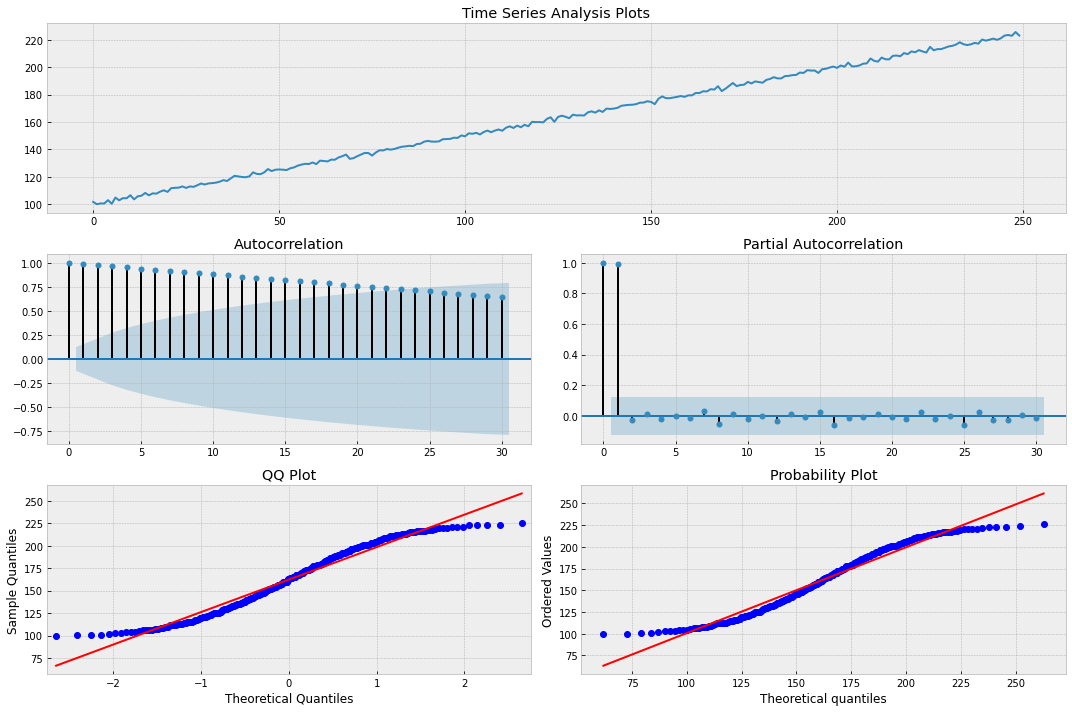

In [5]:
# tsplot definition

def tsplot(y, lags=None, figsize=(15, 10), style='bmh'):
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        fig = plt.figure(figsize=figsize)
        # mpl.rcParams['font.family'] = 'Ubuntu Mono'
        layout = (3, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        qq_ax = plt.subplot2grid(layout, (2, 0))
        pp_ax = plt.subplot2grid(layout, (2, 1))

        y.plot(ax=ts_ax)
        ts_ax.set_title('Time Series Analysis Plots')
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)
        sm.qqplot(y, line='s', ax=qq_ax)
        qq_ax.set_title('QQ Plot')
        scs.probplot(y, sparams=(y.mean(), y.std()), plot=pp_ax)

        plt.tight_layout()
    return

# Random Walk without a drift

np.random.seed(1)
n_samples = 1000


# simulate linear trend

w = np.random.randn(250)
x = np.empty_like(w)

a0 = 100.
a1 = 0.5
for t in range(len(w)):
    x[t] = a0 + a1*t + w[t]
    
_ = tsplot(x, lags=30)

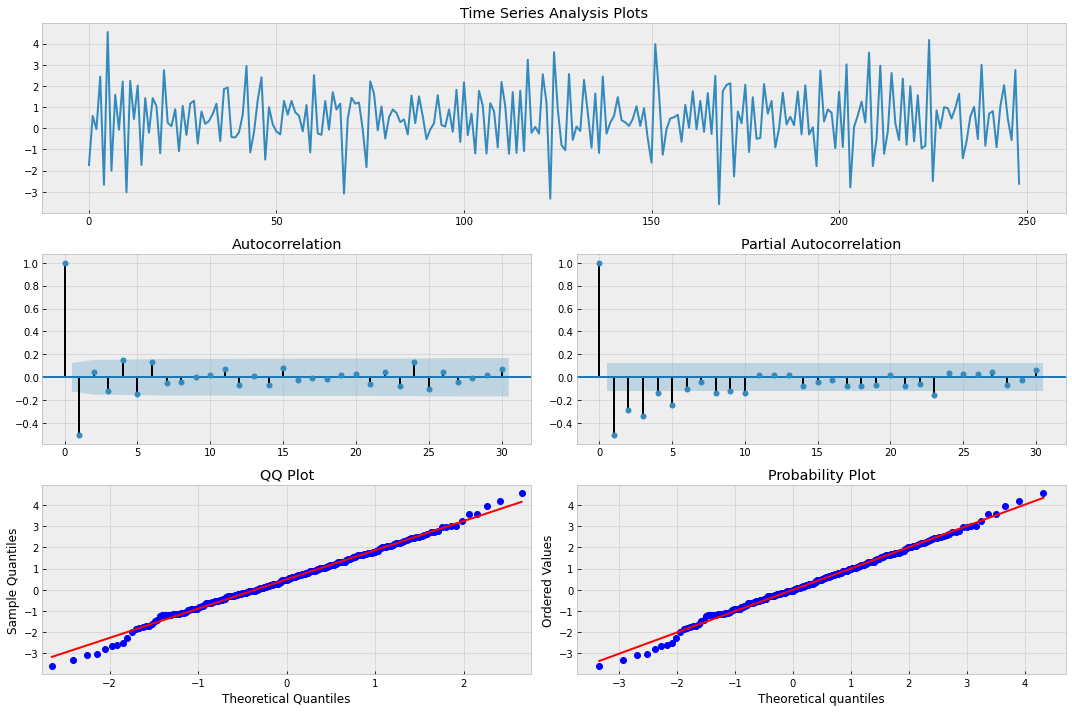

In [6]:
# First difference of simulated prices
_ = tsplot(np.diff(x), lags=30)

On peut voir ici que les résidus du modèle sont corrélés. Bien que la distribution soit à peu près normale, avant d'utiliser ce modèle pour faire des prévisions, nous devrions tenir compte et supprimer l'autocorrélation évidente (la valeur significative à la fin de la période 1) présente dans la série. L'importance du PACF au retard 1 indique qu'un modèle autorégressif peut être approprié.